In [143]:
pip install mlinsights

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
data=pd.read_csv('IE684_lab08.csv')

In [146]:
data.columns=['Age','Year','positive axillary nodes','survival status']

In [147]:
data.head()

,Age,Year,positive axillary nodes,survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [148]:
X_data=data[data.columns[:-1]]
Y_data=data[data.columns[-1]]

In [149]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_data)
X_data=scaler.transform(X_data)

In [150]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=99)
pca.fit(X_data)

PCA(n_components=2, random_state=99)

In [151]:
X_PCA=pca.transform(X_data)

In [152]:
Y=data[data.columns[-1]]

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [154]:
split_ratio=[0.4,0.3,0.2,0.1]
k_values=[1,2,3,4,5]
accuracy_split_l1={}
accuracy_split_l2={}
for ratio in split_ratio:
  print('\n**************************************************')
  print('when split ratio is',(1-ratio)*100,':',ratio*100)
  X_data_train,X_data_test,Y_data_train,Y_data_test = train_test_split(X_PCA, Y, test_size=ratio, random_state=99)
  accuracy_l1=[]
  accuracy_l2=[]
  for k in k_values:
    print('\n************************************')
    print('when k is:',k)
    neigh_l1 = KNeighborsClassifier(n_neighbors=k ,metric= 'manhattan' )
    neigh_l2= KNeighborsClassifier(n_neighbors=k  )
    neigh_l1.fit(X_data_train,Y_data_train)
    neigh_l2.fit(X_data_train,Y_data_train)
    pred_l1=neigh_l1.predict(X_data_test)
    pred_l2=neigh_l2.predict(X_data_test)

    print('accuracy with l1 matric:',accuracy_score(Y_data_test, pred_l1))
    print('accuracy with l2 matric:',accuracy_score(Y_data_test, pred_l2))
    accuracy_l1.append(accuracy_score(Y_data_test, pred_l1))
    accuracy_l2.append(accuracy_score(Y_data_test, pred_l2))
  accuracy_split_l1[ratio]=accuracy_l1
  accuracy_split_l2[ratio]=accuracy_l2



**************************************************
when split ratio is 60.0 : 40.0

************************************
when k is: 1
accuracy with l1 matric: 0.5934959349593496
accuracy with l2 matric: 0.5772357723577236

************************************
when k is: 2
accuracy with l1 matric: 0.6585365853658537
accuracy with l2 matric: 0.6666666666666666

************************************
when k is: 3
accuracy with l1 matric: 0.6260162601626016
accuracy with l2 matric: 0.6097560975609756

************************************
when k is: 4
accuracy with l1 matric: 0.6666666666666666
accuracy with l2 matric: 0.6504065040650406

************************************
when k is: 5
accuracy with l1 matric: 0.6341463414634146
accuracy with l2 matric: 0.6341463414634146

**************************************************
when split ratio is 70.0 : 30.0

************************************
when k is: 1
accuracy with l1 matric: 0.5869565217391305
accuracy with l2 matric: 0.576086956521739

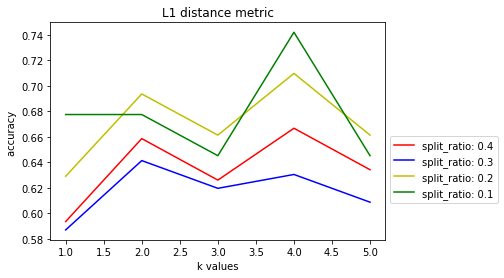

In [155]:
plt.plot(k_values,accuracy_split_l1[split_ratio[0]],color='r',label=f'split_ratio: {split_ratio[0]}')
plt.plot(k_values,accuracy_split_l1[split_ratio[1]],color='b',label=f'split_ratio: {split_ratio[1]}')
plt.plot(k_values,accuracy_split_l1[split_ratio[2]],color='y',label=f'split_ratio: {split_ratio[2]}')
plt.plot(k_values,accuracy_split_l1[split_ratio[3]],color='g',label=f'split_ratio: {split_ratio[3]}')

plt.title('L1 distance metric')
plt.xlabel('k values')
plt.ylabel('accuracy ')
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

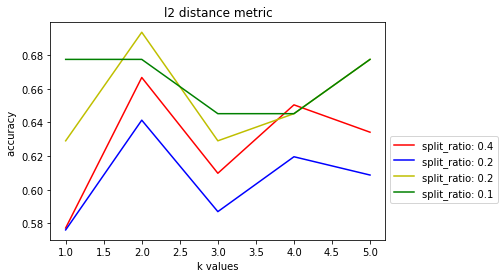

In [156]:
plt.plot(k_values,accuracy_split_l2[split_ratio[0]],color='r',label=f'split_ratio: {split_ratio[0]}')
plt.plot(k_values,accuracy_split_l2[split_ratio[1]],color='b',label=f'split_ratio: {split_ratio[2]}')
plt.plot(k_values,accuracy_split_l2[split_ratio[2]],color='y',label=f'split_ratio: {split_ratio[2]}')
plt.plot(k_values,accuracy_split_l2[split_ratio[3]],color='g',label=f'split_ratio: {split_ratio[3]}')

plt.title('l2 distance metric')
plt.xlabel('k values')
plt.ylabel('accuracy ')
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()


$\text{For Ex2 data:}$

In [157]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [158]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [159]:
data=california_housing.frame

In [160]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_1=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [161]:
# when k=2 (reduced dimension must be 2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=99)
pca.fit(data_1)



PCA(n_components=2, random_state=99)

In [162]:
data_1_d2=pca.transform(data_1)

In [163]:
data_l2=data.copy()

In [164]:
from sklearn.cluster import KMeans
k_values=[2,3,4,5]
for k in k_values:
  kmeans = KMeans(n_clusters=k,random_state=99, n_init="auto" ,tol= 1e-3  ).fit(data_1_d2 )
  label_data=kmeans.labels_
  data_l2[f'prediction with k:{k} with l2']=label_data
data_l2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,prediction with k:2 with l2,prediction with k:3 with l2,prediction with k:4 with l2,prediction with k:5 with l2
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1,2,1,2
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1,2,2,2
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1,1,1,2
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1,1,1,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1,1,1,1


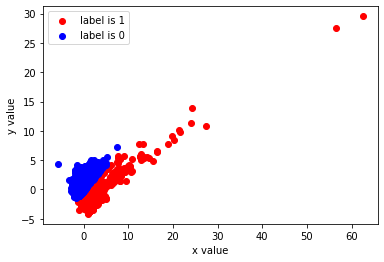

In [165]:
df=pd.DataFrame(data_1_d2,columns=['x','y'])
df['label']=data_l2[f'prediction with k:{2} with l2']
df1=df[df['label']==1]
df2=df[df['label']==0]
plt.scatter(df1['x'],df1['y'],color='r',label='label is 1')
plt.scatter(df2['x'],df2['y'],color='b',label='label is 0')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()

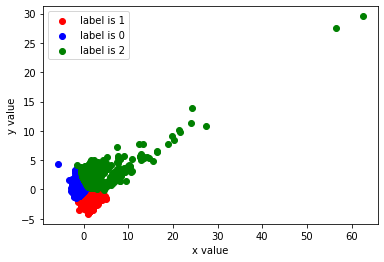

In [166]:
df=pd.DataFrame(data_1_d2,columns=['x','y'])
df['label']=data_l2[f'prediction with k:{3} with l2']
df1=df[df['label']==1]
df2=df[df['label']==0]
df3=df[df['label']==2]
plt.scatter(df1['x'],df1['y'],color='r',label='label is 1')
plt.scatter(df2['x'],df2['y'],color='b',label='label is 0')
plt.scatter(df3['x'],df3['y'],color='g',label='label is 2')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()

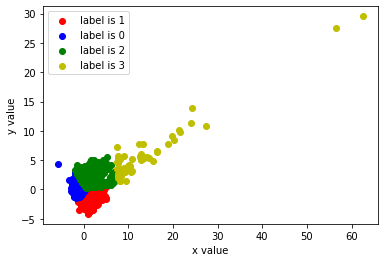

In [167]:
df=pd.DataFrame(data_1_d2,columns=['x','y'])
df['label']=data_l2[f'prediction with k:{4} with l2']
df1=df[df['label']==1]
df2=df[df['label']==0]
df3=df[df['label']==2]
df4=df[df['label']==3]
plt.scatter(df1['x'],df1['y'],color='r',label='label is 1')
plt.scatter(df2['x'],df2['y'],color='b',label='label is 0')
plt.scatter(df3['x'],df3['y'],color='g',label='label is 2')
plt.scatter(df4['x'],df4['y'],color='y',label='label is 3')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()

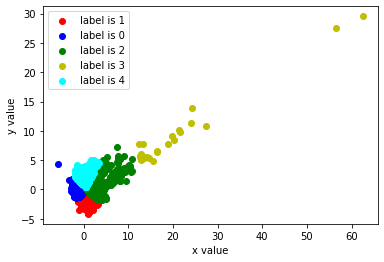

In [168]:
df=pd.DataFrame(data_1_d2,columns=['x','y'])
df['label']=data_l2[f'prediction with k:{5} with l2']
df1=df[df['label']==1]
df2=df[df['label']==0]
df3=df[df['label']==2]
df4=df[df['label']==3]
df5=df[df['label']==4]
plt.scatter(df1['x'],df1['y'],color='r',label='label is 1')
plt.scatter(df2['x'],df2['y'],color='b',label='label is 0')
plt.scatter(df3['x'],df3['y'],color='g',label='label is 2')
plt.scatter(df4['x'],df4['y'],color='y',label='label is 3')
plt.scatter(df5['x'],df5['y'],color='cyan',label='label is 4')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()

In [169]:
df1

,x,y,label
3,1.537078,-0.810004,1
4,1.416914,-1.121116,1
5,1.023718,-1.503093,1
6,0.819253,-1.463167,1
7,0.728173,-1.715481,1
...,...,...,...
20635,0.602464,-2.251757,1
20636,1.264302,-1.815928,1
20637,0.687380,-2.056770,1
20638,0.828435,-2.073240,1


In [170]:
data_l2[f'prediction with k:{2} with l2']

0        1
1        1
2        1
3        1
4        1
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: prediction with k:2 with l2, Length: 20640, dtype: int32

In [171]:
data_l1=data.copy()

In [172]:
from mlinsights.mlmodel import KMeansL1L2

In [173]:
print("For L1 Norm")
for i in k_values:
  kml1 = KMeansL1L2(i, norm='L1',tol = 1e-3,random_state = 99).fit(data_1_d2)
  label_data=kml1.labels_
  data_l1[f"No Of Clusters K = {i}"] = label_data
data_l1.head()

For L1 Norm


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,No Of Clusters K = 2,No Of Clusters K = 3,No Of Clusters K = 4,No Of Clusters K = 5
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1,1,1,2
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1,1,1,2
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1,2,1,2
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1,2,1,2
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1,2,1,2


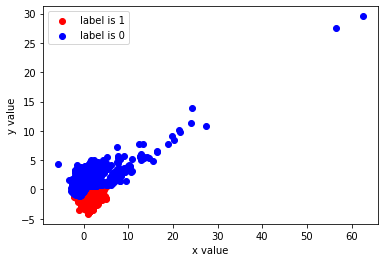

In [174]:
df=pd.DataFrame(data_1_d2,columns=['x','y'])
df['label']=data_l1[f"No Of Clusters K = {2}"]
df1=df[df['label']==1]
df2=df[df['label']==0]
plt.scatter(df1['x'],df1['y'],color='r',label='label is 1')
plt.scatter(df2['x'],df2['y'],color='b',label='label is 0')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()

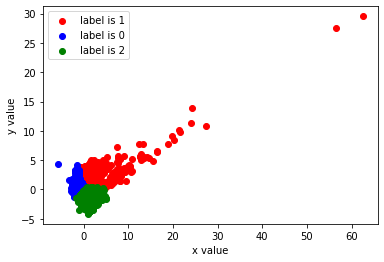

In [175]:
df=pd.DataFrame(data_1_d2,columns=['x','y'])
df['label']=data_l1[f"No Of Clusters K = {3}"]
df1=df[df['label']==1]
df2=df[df['label']==0]
df3=df[df['label']==2]
plt.scatter(df1['x'],df1['y'],color='r',label='label is 1')
plt.scatter(df2['x'],df2['y'],color='b',label='label is 0')
plt.scatter(df3['x'],df3['y'],color='g',label='label is 2')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()

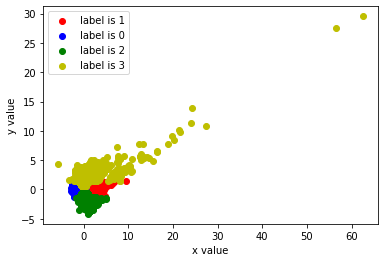

In [176]:
df=pd.DataFrame(data_1_d2,columns=['x','y'])
df['label']=data_l1[f"No Of Clusters K = {4}"]
df1=df[df['label']==1]
df2=df[df['label']==0]
df3=df[df['label']==2]
df4=df[df['label']==3]
plt.scatter(df1['x'],df1['y'],color='r',label='label is 1')
plt.scatter(df2['x'],df2['y'],color='b',label='label is 0')
plt.scatter(df3['x'],df3['y'],color='g',label='label is 2')
plt.scatter(df4['x'],df4['y'],color='y',label='label is 3')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()

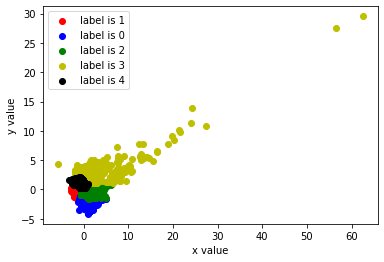

In [177]:
df=pd.DataFrame(data_1_d2,columns=['x','y'])
df['label']=data_l1[f"No Of Clusters K = {5}"]
df1=df[df['label']==1]
df2=df[df['label']==0]
df3=df[df['label']==2]
df4=df[df['label']==3]
df5=df[df['label']==4]
plt.scatter(df1['x'],df1['y'],color='r',label='label is 1')
plt.scatter(df2['x'],df2['y'],color='b',label='label is 0')
plt.scatter(df3['x'],df3['y'],color='g',label='label is 2')
plt.scatter(df4['x'],df4['y'],color='y',label='label is 3')
plt.scatter(df5['x'],df5['y'],color='k',label='label is 4')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()

$\large \text{For 3d case:}$

In [178]:
pca = PCA(n_components=3,random_state=99)
pca.fit(data_1)

PCA(n_components=3, random_state=99)

In [179]:
data_1_d3=pca.transform(data_1)

In [180]:
data_l2=data.copy()

In [181]:
from sklearn.cluster import KMeans
k_values=[2,3,4,5]
for k in k_values:
  kmeans = KMeans(n_clusters=k,random_state=99, n_init="auto" ,tol= 1e-3  ).fit(data_1_d3)
  label_data=kmeans.labels_
  data_l2[f'prediction with k:{k} with l2']=label_data
data_l2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,prediction with k:2 with l2,prediction with k:3 with l2,prediction with k:4 with l2,prediction with k:5 with l2
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1,2,2,2
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1,2,2,2
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1,2,2,2
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1,1,1,2
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1,1,1,1


In [182]:
data_l1=data.copy()

In [183]:
print("For L1 Norm")
for i in k_values:
  kml1 = KMeansL1L2(i, norm='L1',tol = 1e-3,random_state = 99).fit(data_1_d3)
  data_l1[f"No Of Clusters K = {i}"] = kml1.labels_
data_l1.head()

For L1 Norm


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,No Of Clusters K = 2,No Of Clusters K = 3,No Of Clusters K = 4,No Of Clusters K = 5
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1,1,2,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1,1,2,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1,2,2,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1,2,2,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1,2,2,0
